In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta


from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor



from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


import random



from sklearn.linear_model import LinearRegression



import matplotlib.pyplot as plt
import matplotlib.dates as mdates



from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
import os







import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# define base model (neural network)
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, kernel_initializer='normal', activation='relu')) #, input_dim=2
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model




Ridge2=Ridge()
Ridge3=Ridge()
Ridge4=Ridge()

models=[Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), XGBRegressor(verbosity=0), LGBMRegressor() ,KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)]
#models=[Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), XGBRegressor(verbosity=0), LGBMRegressor() , Ridge2] # KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)]#, Ridge()]#
#models=[Ridge(), Lasso(), ElasticNet(), Ridge(), Lasso(), Ridge(), Ridge(), Ridge()] 
models=[ Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), XGBRegressor(verbosity=0), LGBMRegressor()]
#models=[Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor()]#, Ridge2, Ridge3 , Ridge4]
models=[ElasticNet()]


def data_change(data, lag, horizon, rolling_window):
  lagged_y=pd.concat([data.y.shift(lag).rename('{}_lag{}'.format(data.y.name, lag)) for lag in range(lag+1)], axis=1)
  lagged_y=lagged_y.drop(['y_lag0'], axis = 1) 

  dat_ML=pd.concat([data,lagged_y], axis = 1).dropna()

  dates_test=dat_ML.date[rolling_window-1+horizon:]

  dat_ML=dat_ML.drop(dat_ML.columns[[0]], axis=1) 
 
  y_train=dat_ML.y[horizon:]#y_train=dat_ML.y[:-horizon]
  X_train=dat_ML.drop(['y'], axis = 1)[:-horizon] #X_train=dat_ML.drop(['y'], axis = 1)[:-horizon] 
  y_test=dat_ML.y[rolling_window-1+horizon:] #y_test=dat_ML.y[rolling_window-1+horizon:]
  X_test=dat_ML.drop(['y'], axis = 1)[rolling_window-1:-horizon] #X_test=dat_ML.drop(['y'], axis = 1)[rolling_window-1+horizon:]

  return X_train, y_train, X_test, y_test, dates_test


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



'''
def forecasting(X_train, y_train, X_test, y_test, horizon, rolling_window, model, dates_test, normalize=False, expanding=False, hyper):
  prognozy=[]
  real=[]
  dates=[]
  for i, el in enumerate(y_train):
    #if i>0:
    #        break
    if i<=(len(y_train)-rolling_window-1):
    #if i=

     
          if i==(len(y_train)-rolling_window-1):
            print(i, end=' ')

          model_1=model

          if expanding==True:
            X_train_roll=X_train.iloc[0:(i+rolling_window),:]
            y_train_roll=y_train.iloc[0:(i+rolling_window)]
            X_test_roll=X_test.iloc[(i+1):(i+2),:]
            y_test_roll=y_test.iloc[i+1]


          if expanding==False:   

            X_train_roll=X_train.iloc[i:(i+rolling_window),:]
            y_train_roll=y_train.iloc[i:(i+rolling_window)]
            X_test_roll=X_test.iloc[(i+1):(i+2),:]
            y_test_roll=y_test.iloc[i+1]
          



          iscl='bhbh'
          if (normalize==True and model not in [iscl]):
            sc = StandardScaler()
            X_train_roll=sc.fit_transform(X_train_roll)
            X_test_roll = sc.transform(X_test_roll)

          model_1.fit(X_train_roll,y_train_roll)
          y_predicted=model_1.predict(X_test_roll)
          real.append(y_test_roll)
          prognozy.append(y_predicted)
          dates.append(dates_test.iloc[i+1])
          
          

          #print(X_train_roll)
          #print(X_test_roll)
          #print(y_train_roll)
          #print(y_test_roll)
          
          

  return prognozy, real, dates
'''

import warnings
warnings.filterwarnings('ignore')





def create_fulldataset(imput_data, freq_vect_1):
  dat_ML=pd.merge(freq_vect_1,imput_data,on='date', how='inner')
  #dat_ML=dat_ML.drop(dat_ML.columns[[0]], axis=1) 
  dat_ML.rename({'value': 'y'}, axis=1, inplace=True)

  return dat_ML


In [ ]:
def forecasting(X_train, y_train, X_test, y_test, horizon, rolling_window, model, dates_test, normalize=False, expanding=False, hyperparam_optimal=False):
  prognozy=[]
  real=[]
  dates=[]

  #[Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(), XGBRegressor(verbosity=0), LGBMRegressor() , Ridge2] 
  # KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)]#, Ridge()]#

  if str(model).startswith('ElasticNet'):
          parameters = {
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "l1_ratio": np.arange(0.0, 1.0, 0.1)
          }

  if str(model).startswith('SVR'):
          parameters = {
        'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['auto', 1e-3, 1e-4],
        'C': [0.01, .1, 1, 10, 100, 1000]}

  if str(model).startswith('RandomForestRegressor'):
          parameters = {
        # Number of trees in random forest
#        "n_estimators" : [int(x) for x in np.linspace(start = 5, stop = 40, num = 5)],
        # Number of features to consider at every split
#        "max_features" : ['auto', 'sqrt'],
        # Maximum number of levels in tree
#        "max_depth" : [int(x) for x in np.linspace(10, 80, num = 5)],
        # Minimum number of samples required to split a node
        "min_samples_split" : [2, 5, 10],
        # Minimum number of samples required at each leaf node
 #       "min_samples_leaf" :  [1, 2, 4],
        # Method of selecting samples for training each tree
 #       "bootstrap" :  [True, False],
 #       "criterion": 'mse'
 }

 
  if str(model).startswith('XGBR'):
            parameters = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4], "objective":['reg:squarederror']}    #, "verbosity" : 0},


  if str(model).startswith('LGBMR'):
            parameters = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'metric':'rmse',
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4]
    }

  #KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)




  for i, el in enumerate(y_train):
    #if i>0:
    #        break
    if i<=(len(y_train)-rolling_window-1):
    #if i=

     
          if i==(len(y_train)-rolling_window-1):
            print(i, end=' ')

          model_1=model

          if expanding==True:
            X_train_roll=X_train.iloc[0:(i+rolling_window),:]
            y_train_roll=y_train.iloc[0:(i+rolling_window)]
            X_test_roll=X_test.iloc[(i+1):(i+2),:]
            y_test_roll=y_test.iloc[i+1]


          if expanding==False:   

            X_train_roll=X_train.iloc[i:(i+rolling_window),:]
            y_train_roll=y_train.iloc[i:(i+rolling_window)]
            X_test_roll=X_test.iloc[(i+1):(i+2),:]
            y_test_roll=y_test.iloc[i+1]
          



          iscl='bhbh'
          if (normalize==True and model not in [iscl]):
            sc = StandardScaler()
            X_train_roll=sc.fit_transform(X_train_roll)
            X_test_roll = sc.transform(X_test_roll)




          if hyperparam_optimal==True:

            best_params = hyperparameter_tune(model_1, parameters, 5, 2, X_train_roll, y_train_roll)         
            model_2=model_1.set_params(**best_params)
            model_2.fit(X_train_roll,y_train_roll)
            y_predicted=model_2.predict(X_test_roll)
            real.append(y_test_roll)
            prognozy.append(y_predicted)
            dates.append(dates_test.iloc[i+1])
            
            print(i,': hyperparametrs optimal', end=',')
          

          else:

            model_1.fit(X_train_roll,y_train_roll)
            y_predicted=model_1.predict(X_test_roll)
            real.append(y_test_roll)
            prognozy.append(y_predicted)
            dates.append(dates_test.iloc[i+1])




          #print(X_train_roll)
          #print(X_test_roll)
          #print(y_train_roll)
          #print(y_test_roll)
          
          

  return prognozy, real, dates

In [ ]:
def hyperparameter_tune(base_model, parameters, n_iter, kfold, X, y):
    start_time = time.time()
    
    # Arrange data into folds with approx equal proportion of classes within each fold
    k = 3
    
    optimal_model = RandomizedSearchCV(base_model,
                            param_distributions=parameters,
                            n_iter=n_iter,
                            cv=k,
                            n_jobs=-1,
                            random_state=2020) #, scoring='neg_mean_squared_error')
    
    


    
    optimal_model.fit(X, y)
    
    stop_time = time.time()

    #scores = cross_val_score(optimal_model, X, y, cv=k, scoring="accuracy")
    
    #print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    #print("====================")
    
    #print("Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}".format(scores.mean(), scores.std()))
    #print("Best Score: {:.3f}".format(optimal_model.best_score_))
    #print("Best Parameters: {}".format(optimal_model.best_params_))
    
    return optimal_model.best_params_

In [ ]:
!ls "/content/drive/My Drive/myvkr"

ls: cannot access '/content/drive/My Drive/myvkr': No such file or directory


In [ ]:
#df_macro = pd.read_csv('/content/drive/My Drive/myvkr/data_macro_v2.csv', sep='\t')
df_macro = pd.read_csv('/content/drive/My Drive/Disser/myvkr/data_macro_v2.csv', sep='\t')

In [ ]:
df_macro['date'] = pd.to_datetime(df_macro.fielddate)
df_macro

,fielddate,CPI_M_CHI,WAG_M,WAG_C_M,IP2_EA_M,UNEMPL_M_SH,RTRD_M_DIRI,RTRD_M,INVFC_M,IM_T_M,USD,EUR,RTS_LAST_VALUE,RTS_CLOSE_MEAN,RTS_TRADING_VOLUME_MEAN,DEP_FIZ,IPOT_CNT,IPOT_VOLUME,IPOT_DEBT,date
0,1992-01,345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-01-01
1,1992-02,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-02-01
2,1992-03,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-03-01
3,1992-04,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-04-01
4,1992-05,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2020-02,100.3,267.5,47257.0,112.9,4.6,273.2,2628.9,NaN,18.7,63.979750,69.852565,1299.69,1506.338421,1.216467e+09,3.017356e+07,NaN,NaN,NaN,2020-02-01
338,2020-03,100.6,286.5,50948.0,120.1,4.7,301.0,2917.5,NaN,20.4,73.719442,81.492847,1014.44,1050.798095,1.837732e+09,3.082081e+07,NaN,NaN,NaN,2020-03-01
339,2020-04,100.8,274.2,49306.0,109.1,5.8,215.5,2110.0,NaN,17.6,74.763533,81.211672,1125.03,1086.733636,1.172953e+09,3.146570e+07,NaN,NaN,NaN,2020-04-01
340,2020-05,100.3,280.8,50747.0,103.1,6.1,230.0,2257.3,NaN,17.2,72.500294,78.967067,1219.76,1165.390526,1.075121e+09,3.148029e+07,NaN,NaN,NaN,2020-05-01


In [ ]:
def min_max_scaler(df, col):
    mx = df[col].max()
    mn = df[col].min()
    df[col] = 100*(df[col] - mn)/(mx - mn)
    pass

In [ ]:
gdp=pd.read_excel('/content/drive/MyDrive/ceic/Gross Domestic Product MOF Estimate Monthly.xlsx', skiprows=26, header=None)
gdp = gdp.rename({0: 'date', 1: 'value'}, axis=1)

In [ ]:
def tempos(gdp):
  gdp['value']=(gdp.value)/gdp.value.diff(12)
  return gdp.dropna()

In [ ]:
USD=df_macro[['date', 'USD_ret']]
USD=USD.rename(columns={'USD_ret':'y'})
USD=USD.dropna().reset_index(drop=True)

In [ ]:
CPI=df_macro[['date','CPI_M_CHI_diff_12']]
CPI=CPI.rename(columns={'CPI_M_CHI_diff_12':'y'})
CPI=CPI.dropna().reset_index(drop=True)

In [ ]:
UNEMPL=df_macro[['date',  'UNEMPL_M_SH_diff_12']]
UNEMPL=UNEMPL.rename(columns={'UNEMPL_M_SH_diff_12':'y'})
UNEMPL=UNEMPL.dropna().reset_index(drop=True)

In [ ]:
gdp=tempos(gdp).reset_index(drop=True)
#CPI=tempos(CPI).reset_index(drop=True)
#Unempl=tempos(Unempl).reset_index(drop=True)

In [ ]:
imput_data={'gdp':gdp, 'CPI':CPI,'Unempl':UNEMPL,'USD':USD}

In [ ]:
freq_vect=pd.read_csv('/content/drive/My Drive/Disser/myvkr/freq_vect.csv')

In [ ]:
freq_vect=freq_vect.iloc[:,1:]
freq_vect['date'] = pd.to_datetime(freq_vect['date'])

#freq_vect=freq_vectt


freq_vect['date']=freq_vect['date'].apply(lambda s: datetime(s.year, s.month, 1))
freq_vect['date']=freq_vect['date'].apply(lambda s: s+relativedelta(months=1))
freq_vect_1=freq_vect.groupby('date', as_index=False).mean()

freq_vect_1=freq_vect_1.loc[:, (freq_vect_1 != 0).any(axis=0)]

In [ ]:
def simple_prognozy_full(imput_data, freq_vect_1, horizon, rolling_window, model, make_plot=False, normalize=False, expanding=False, hyperparam_optimal=False ):
  dat_ML=create_fulldataset(imput_data, freq_vect_1)
  X_train, y_train, X_test, y_test, dates_test=data_change(dat_ML, lag=1, horizon=horizon, rolling_window=rolling_window)
  prognozy, real, dates =forecasting(X_train, y_train, X_test, y_test, horizon=horizon, rolling_window=rolling_window, model=model, dates_test=dates_test, normalize=normalize, expanding=expanding, hyperparam_optimal=hyperparam_optimal)
  rmse=np.sqrt(mean_squared_error(prognozy, real))
  print(rmse)

  if make_plot==True:
    plot_simple_prognozy_full(prognozy, real, dates, model=model)

  return (prognozy, real, dates, rmse, dates_test)



#prognozy, real, dates, rmse, dates_test=simple_prognozy_full(imput_data, freq_vect_1, horizon, rolling_window, model)

def plot_simple_prognozy_full(prognozy, real, dates, model): 

  df=pd.DataFrame(list(zip(prognozy, real, dates)), columns = ['prognozy', 'real', 'dates'])
  df=df.set_index('dates')
  plt.figure(figsize=(20, 7))
  plt.plot(df.prognozy, "g", label="prediction", linewidth=2.0)
  plt.plot(df.real, label="actual", linewidth=2.0)
  plt.legend(loc='best')

  rmse=np.sqrt(mean_squared_error(prognozy, real))
  plt.title(" RMSE error = {0:.2f}, {1}".format( rmse, str(model)[0:5]))

  plt.grid(True);

#plot_simple_prognozy_full(prognozy, real, dates)

In [ ]:
def all_prognozy_full(imput_data, freq_vect_1, horizon, rolling_window, models, make_plot_for_each=False , normalize=False, expanding=False, hyperparam_optimal=False):
  dat_ML=create_fulldataset(imput_data, freq_vect_1)


  RMSEs=[]
  y_predicts=pd.DataFrame()
  random.seed(3)
  for modell in models:
    print(str(modell)[0:5])

    prognozy, real, dates, rmse, dates_test=simple_prognozy_full(imput_data, freq_vect_1, horizon, rolling_window, model=modell, make_plot=make_plot_for_each , normalize=normalize, expanding=expanding, hyperparam_optimal=hyperparam_optimal)


    #prognozy, real, dates =forecasting(X_train, y_train, X_test, y_test, horizon=horizon, rolling_window=rolling_window, model=modell, dates_test=dates_test, normalize=False)
    y_predicts["{}".format(str(modell)[0:5])]=prognozy
    rmse=np.sqrt(mean_squared_error(prognozy, real))
    RMSEs.append(rmse)

    y_predicts['dates']=dates
    y_predicts=y_predicts.set_index('dates')
    y_predicts=y_predicts.rename(columns={'Ridge':'Ridge', 'Lasso': 'Lasso', 'Elast': 'Elastic Net', 
                                          'SVR(C':'SVR' , 'Rando':'Random Forest' , 'XGBRe': 'XGBR', 'LGBMR':'LGBMR' , '<tens': 'Neural Network' , 'Linea':'reg_ar1' })
  
  return y_predicts,RMSEs, real, dates




def plot_all_prognozy_full(y_predicts, real, dates): 


  df=pd.DataFrame(list(zip(real, dates)), columns = ['real', 'dates'])
  df=df.set_index('dates')
  plt.figure(figsize=(20, 7))
  #plt.plot(df.prognozy, "g", label="prediction", linewidth=2.0)
  plt.plot(df.real, "b",label="actual", linewidth=2.0)
  #plt.plot(df.real, label="actual", linewidth=2.0)
  #plt.plot(y_predicts[col], linewidth=2.0, label="prediction")  #label="{}".format(col))
  for i, col in enumerate(y_predicts.columns):
      plt.plot(y_predicts[col], linewidth=2.0 , label="{}".format(col))
      #plt.title(col)


  plt.legend(loc='best')

  #rmse=np.sqrt(mean_squared_error(prognozy, real))
  #plt.title("RMSE error = {0:.2f}".format(rmse))

  plt.grid(True)
  return None



def AR_model(imput_data, freq_vect_1, horizon, rolling_window, expanding=False):

  dat_ML=create_fulldataset(imput_data, freq_vect_1)
  X_train, y_train, X_test, y_test, dates_test=data_change(dat_ML, lag=1, horizon=horizon, rolling_window=rolling_window)

  prognozy_AR, real_AR, dates_AR =forecasting(pd.DataFrame(X_train.y_lag1), y_train, pd.DataFrame(X_test.y_lag1), y_test, horizon=horizon, rolling_window=rolling_window, model=LinearRegression(), dates_test=dates_test, expanding=expanding)
  
  rmse_AR=np.sqrt(mean_squared_error(prognozy_AR, real_AR))
  rmse_AR

  return prognozy_AR, real_AR, dates_AR, rmse_AR






def RMSE_improvements(RMSEs, rmse_AR, names):
  relative_imporovement=RMSEs/rmse_AR

  #y_predict_columns_renamed=['Ridge', 'Lasso', 'Elastic Net', 'SVR', 'Random Forest', 'XGBR', 'LGBMR', 'Neural Network']

  
  relative_imporovement=pd.DataFrame(relative_imporovement, index=names, columns=['RMSE/RMSE_AR'])
  return relative_imporovement


def bar_plot(relative_imporovement, name, error=0.000001):
  
  #error=0.000001
  #error=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01 ]
  fig, ax = plt.subplots()
  color_dict={'Ridge':'purple', 'Lasso':'orange', 'Elastic Net':'cyan', 'SVR':'blue', 'Random Forest':'yellow', 'XGBR':'red', 'LGBMR':'green', 'Neural Network':'black'}
  #ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'orange'], xerr=error)
  #ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple'], xerr=error)
  ax.barh(relative_imporovement.index,  relative_imporovement['RMSE/RMSE_AR'] , xerr=error, color=[color_dict[x] for x in relative_imporovement.index])

  plt.axvline(x=1)
  ax.set_xlabel('relative imporovement')
  ax.set_title('RMSE/RMSE_AR {}'.format(name))

  plt.show()

  return None

In [ ]:
%time
#result_1=simple_prognozy_full(imput_data['CPI'], freq_vect_1, horizon=3, rolling_window=36, model=ElasticNet(), make_plot=True, expanding=True)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


In [ ]:
#для гиперпараметров

In [ ]:
%time
#result_1=simple_prognozy_full(imput_data['CPI'], freq_vect_1, horizon=3, rolling_window=36, model=RandomForestRegressor(), make_plot=True, expanding=True, hyperparam_optimal=True)


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 12.2 µs


In [ ]:
myl2=[]
for x in myl:
  
  name=df_macro[['date',  x]]
 
  name=name.rename(columns={x:'y'})
  name=name.dropna().reset_index(drop=True)
  vars()[x]=name
  

In [ ]:
all_rmse

{'CPI_h3':        RMSE/RMSE_AR
 Ridge      1.252446
 Lasso      1.004565, 'CPI_h6':        RMSE/RMSE_AR
 Ridge      1.310139
 Lasso      0.998206, 'CPI_h9':        RMSE/RMSE_AR
 Ridge      1.249948
 Lasso      0.995916, 'DEPOSIT_h3':        RMSE/RMSE_AR
 Ridge      1.169874
 Lasso      1.028998, 'DEPOSIT_h6':        RMSE/RMSE_AR
 Ridge      0.946315
 Lasso      0.994057, 'DEPOSIT_h9':        RMSE/RMSE_AR
 Ridge      0.931368
 Lasso      1.071313, 'GDP_h3':        RMSE/RMSE_AR
 Ridge      1.340276
 Lasso      3.308110, 'GDP_h6':        RMSE/RMSE_AR
 Ridge      1.289900
 Lasso      1.560137, 'GDP_h9':        RMSE/RMSE_AR
 Ridge      1.217252
 Lasso      1.517076, 'IMPORT_h3':        RMSE/RMSE_AR
 Ridge      1.564438
 Lasso      1.197562, 'IMPORT_h6':        RMSE/RMSE_AR
 Ridge      1.290661
 Lasso      1.157053, 'IMPORT_h9':        RMSE/RMSE_AR
 Ridge      1.033504
 Lasso      1.025283, 'MORTGAGE_h3':        RMSE/RMSE_AR
 Ridge      1.066739
 Lasso      1.424371, 'MORTGAGE_h6':        RM

In [ ]:
averaged_RMSE

{'avg_CPI': Ridge    1.270844
 Lasso    0.999562
 Name: avg_CPI, dtype: float64, 'avg_DEPOSIT': Ridge    1.015853
 Lasso    1.031456
 Name: avg_DEPOSIT, dtype: float64, 'avg_GDP': Ridge    1.282476
 Lasso    2.128441
 Name: avg_GDP, dtype: float64, 'avg_IMPORT': Ridge    1.296201
 Lasso    1.126633
 Name: avg_IMPORT, dtype: float64, 'avg_MORTGAGE': Ridge    1.035309
 Lasso    1.230660
 Name: avg_MORTGAGE, dtype: float64, 'avg_UNEMPL': Ridge    1.342508
 Lasso    1.077262
 Name: avg_UNEMPL, dtype: float64, 'avg_USD': Ridge    1.158972
 Lasso    1.706270
 Name: avg_USD, dtype: float64, 'avg_WAGES': Ridge    1.193437
 Lasso    1.095714
 Name: avg_WAGES, dtype: float64}

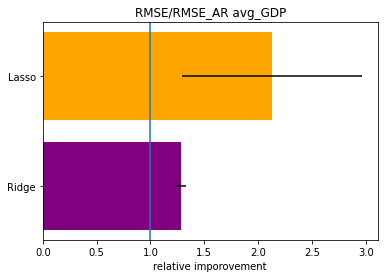

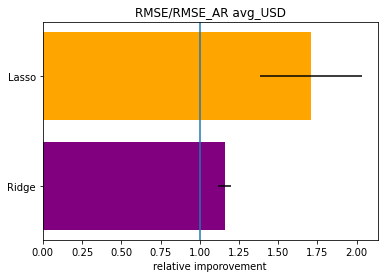

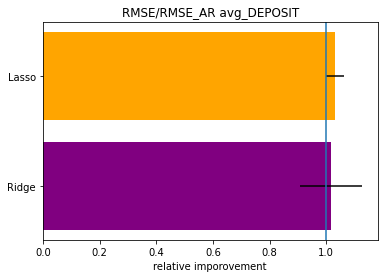

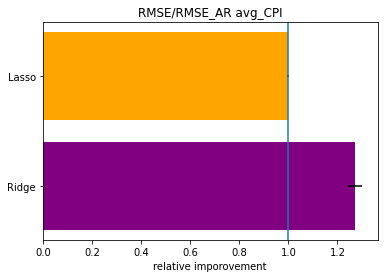

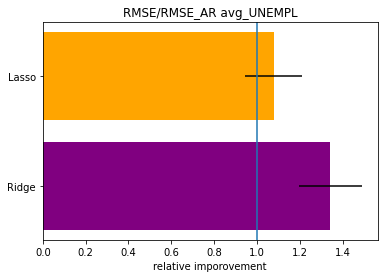

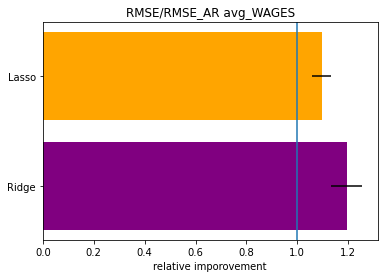

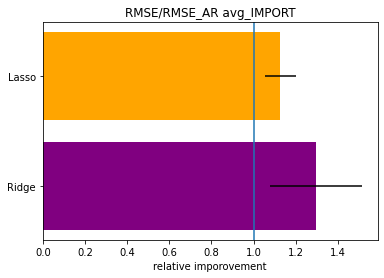

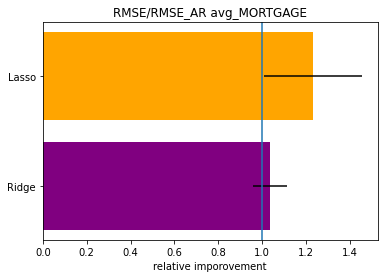

In [ ]:
for i,x in enumerate(averaged_RMSE):
  ddd=pd.DataFrame(averaged_RMSE[x])
  ddd=ddd.rename(columns={ddd.columns[0]: 'RMSE/RMSE_AR'})
  bar_plot(ddd, x, error=sd_RMSE_all[i])

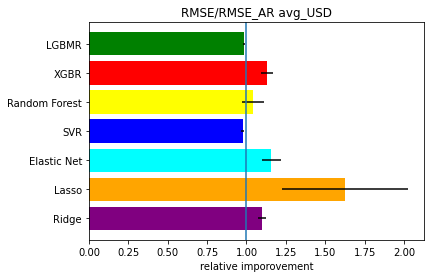

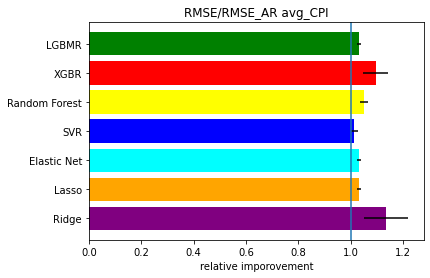

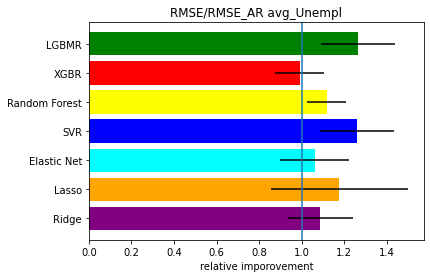

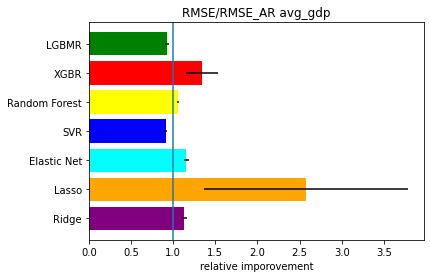

In [ ]:
for i,x in enumerate(averaged_RMSE):
  ddd=pd.DataFrame(averaged_RMSE[x])
  ddd=ddd.rename(columns={ddd.columns[0]: 'RMSE/RMSE_AR'})
  bar_plot(ddd, x, error=sd_RMSE_all[i])

In [ ]:
#optimized hyper

In [ ]:
%time
d = {}
#models=[LinearRegression()]
#all_rmse=pd.DataFrame()
all_rmse={}
#horizon=3
rolling_window=36
#models=[ Ridge(), Lasso(), ElasticNet(), SVR(), RandomForestRegressor(n_estimators=5), XGBRegressor(verbosity=0), LGBMRegressor()]
models=[ ElasticNet(), SVR(), RandomForestRegressor(n_estimators=5), XGBRegressor(verbosity=0), LGBMRegressor()]
#models=[ElasticNet(), SVR()]

horizons=[3,6,9]
#imput_data={'gdp':gdp, 'CPI':CPI,'Unempl':Unempl}
#imput_data={'USD':USD, 'CPI':CPI,'Unempl':UNEMPL, 'gdp':gdp}

imput_data={'GDP':gdp,
           # 'RTS_LAST_VALUE_ret':RTS_LAST_VALUE_ret, 'RTS_CLOSE_MEAN_ret':RTS_CLOSE_MEAN_ret,
       'MORTGAGE':IPOT_CNT_diff_12 }


imput_data={'GDP':gdp,
           # 'RTS_LAST_VALUE_ret':RTS_LAST_VALUE_ret, 'RTS_CLOSE_MEAN_ret':RTS_CLOSE_MEAN_ret,
       #'RTS_TRADING_VOLUME_MEAN_ret':RTS_TRADING_VOLUME_MEAN_ret, 
       'USD':USD_ret, 
       #'EUR_ret':EUR_ret, 
       'DEPOSIT':DEP_FIZ_diff_12,
       'CPI':CPI_M_CHI_diff_12, #'IP2_EA_M_diff_12':IP2_EA_M_diff_12, 
       'UNEMPL':UNEMPL_M_SH_diff_12,
       'WAGES':WAG_M_diff_12, #'WAG_C_M_diff_12':WAG_C_M_diff_12, 'RTRD_M_DIRI_diff_12':RTRD_M_DIRI_diff_12,
       #'RTRD_M_diff_12':RTRD_M_diff_12,# 'INVFC_M_diff_12':INVFC_M_diff_12, 
       'IMPORT':IM_T_M_diff_12,
       'MORTGAGE':IPOT_CNT_diff_12 }
       #'IPOT_VOLUME_diff_12':IPOT_VOLUME_diff_12, 
       #'IPOT_DEBT_diff_12':IPOT_DEBT_diff_12}



df_rmse_DM=pd.DataFrame()

for series in imput_data:
  for horizont in horizons:

    result_t=all_prognozy_full(imput_data[series], freq_vect_1, horizon=horizont, rolling_window=rolling_window, models=models , make_plot_for_each=False, normalize=True, expanding=True, hyperparam_optimal=True)
    y_predicts_t, RMSE_t, real_t, dates_t=result_t
    #plot_all_prognozy_full(y_predicts_t, real_t, dates_t)
    #y_predicts["{}".format(str(modell)[0:5])]=prognozy

    prognozy_AR_1, real_AR_1, dates_AR_1, rmse_AR_1=AR_model(imput_data[series], freq_vect_1, horizont, rolling_window, expanding=True)

    df_rmse_DM=y_predicts_t
    df_rmse_DM["real"]=real_t
    df_rmse_DM["AR_1"]=prognozy_AR_1

    d[series+'_'+'h'+str(horizont)] = df_rmse_DM

    print('df_rmse_DM_ok')

    relative_imporovement_1=RMSE_improvements(RMSE_t, rmse_AR_1, y_predicts_t.columns[:-2])
    print('relative imp OK')


    all_rmse[series+'_'+'h'+str(horizont)]=relative_imporovement_1


    #bar_plot(relative_imporovement_1)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 6.2 µs
Elast
0 : hyperparametrs optimal,1 : hyperparametrs optimal,2 : hyperparametrs optimal,3 : hyperparametrs optimal,4 : hyperparametrs optimal,5 : hyperparametrs optimal,6 : hyperparametrs optimal,7 : hyperparametrs optimal,8 : hyperparametrs optimal,9 : hyperparametrs optimal,10 : hyperparametrs optimal,11 : hyperparametrs optimal,12 : hyperparametrs optimal,13 : hyperparametrs optimal,14 : hyperparametrs optimal,15 : hyperparametrs optimal,16 : hyperparametrs optimal,17 : hyperparametrs optimal,18 : hyperparametrs optimal,19 : hyperparametrs optimal,20 : hyperparametrs optimal,21 : hyperparametrs optimal,22 : hyperparametrs optimal,23 : hyperparametrs optimal,24 : hyperparametrs optimal,25 : hyperparametrs optimal,26 : hyperparametrs optimal,27 : hyperparametrs optimal,28 : hyperparametrs optimal,29 : hyperparametrs optimal,30 : hyperparametrs optimal,31 : hyperparametrs optimal,32 : hyperparametrs optimal,33 : hype

In [ ]:
mylist=list(all_rmse.keys())
res = [i for i in mylist if i.startswith('gdp')]

averaged_RMSE=pd.DataFrame()
sd_RMSE=pd.DataFrame()
sd_RMSE_all=[]

d_subset={}

count=0

for data_name in list(imput_data.keys()):
  #length=len(all_rmse[res])
  #averaged_RMSE=pd.DataFrame([0]*length, columns=['{}_avg'.format(res)])
  d_subset={}
  print(data_name)

  for k,v in all_rmse.items():
    if k.startswith(data_name):
      print(k)
      d_subset[k]=v

  new=sum(d_subset.values())/len(d_subset)
  new.columns=["avg_{}".format(data_name)]
  averaged_RMSE=pd.concat([averaged_RMSE,new], axis=1)
  
  #averaged_RMSE["RMSE/RMSEar_avg_{}".format(data_name)]=sum(d_subset.values())/len(d_subset)
  sd_RMSE=np.array(list(d_subset.values())).std(axis=0).tolist()
  sd_RMSE=[i for b in map(lambda x:[x] if not isinstance(x, list) else x, sd_RMSE) for i in b]
  sd_RMSE_all.append(sd_RMSE)

averaged_RMSE=averaged_RMSE.to_dict('series')
averaged_RMSE
sd_RMSE_all

GDP
GDP_h3
GDP_h6
GDP_h9
USD
USD_h3
USD_h6
USD_h9
DEPOSIT
DEPOSIT_h3
DEPOSIT_h6
DEPOSIT_h9
CPI
CPI_h3
CPI_h6
CPI_h9
UNEMPL
UNEMPL_h3
UNEMPL_h6
UNEMPL_h9
WAGES
WAGES_h3
WAGES_h6
WAGES_h9
IMPORT
IMPORT_h3
IMPORT_h6
IMPORT_h9
MORTGAGE
MORTGAGE_h3
MORTGAGE_h6
MORTGAGE_h9


[[0.0196161936824381,
  0.015887517382629664,
  0.017069448626006196,
  0.02762336003931201,
  0.018238221935730995],
 [0.08527582844134655,
  0.002452371796281692,
  0.053081352152575166,
  0.01407767929839974,
  0.008490190099217802],
 [0.16048836684258766,
  0.15450649994321303,
  0.14464470329507348,
  0.1436759797989602,
  0.16048196192441622],
 [0.02924399488243043,
  0.01699667761568485,
  0.05917961622902558,
  0.03316024368680112,
  0.006152929353259028],
 [0.2267032804862276,
  0.1370767295456805,
  0.11118203412104452,
  0.1046756899479667,
  0.15050897590846823],
 [0.1542775431450178,
  0.19413828313830697,
  0.027301307536704914,
  0.08622277129528523,
  0.1649940924372636],
 [0.11659705479660193,
  0.17924076999158337,
  0.030065757400491656,
  0.1013209505409942,
  0.17911638298656807],
 [0.13291484712866244,
  0.1281872393801185,
  0.05890286693700237,
  0.03127828803851132,
  0.05879592656104764]]

In [ ]:
averaged_RMSE

{'avg_CPI': Elastic Net      1.014577
 SVR              1.017238
 Random Forest    1.035795
 XGBR             0.984804
 LGBMR            0.994224
 Name: avg_CPI, dtype: float64, 'avg_DEPOSIT': Elastic Net      1.084105
 SVR              1.068135
 Random Forest    1.108930
 XGBR             0.976198
 LGBMR            1.080221
 Name: avg_DEPOSIT, dtype: float64, 'avg_GDP': Elastic Net      0.917923
 SVR              0.912586
 Random Forest    1.016068
 XGBR             0.980745
 LGBMR            0.915213
 Name: avg_GDP, dtype: float64, 'avg_IMPORT': Elastic Net      1.096328
 SVR              1.168187
 Random Forest    0.996321
 XGBR             0.906187
 LGBMR            1.140657
 Name: avg_IMPORT, dtype: float64, 'avg_MORTGAGE': Elastic Net      1.125072
 SVR              0.978174
 Random Forest    0.982755
 XGBR             0.908270
 LGBMR            1.018767
 Name: avg_MORTGAGE, dtype: float64, 'avg_UNEMPL': Elastic Net      1.282199
 SVR              1.166918
 Random Forest    1.165

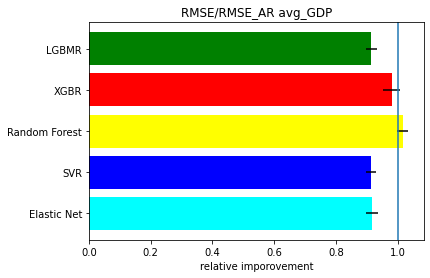

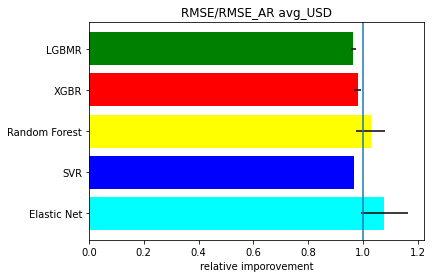

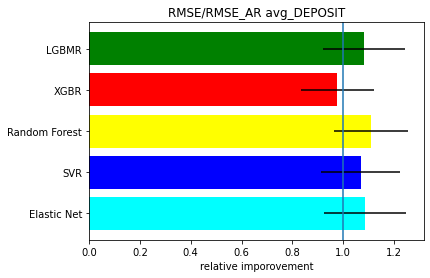

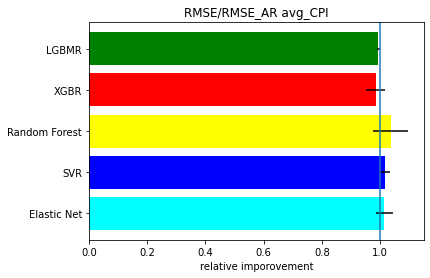

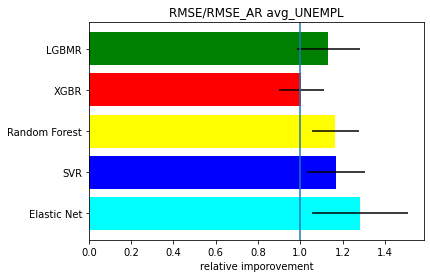

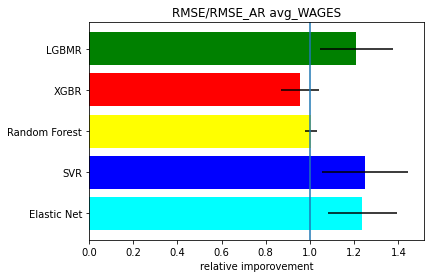

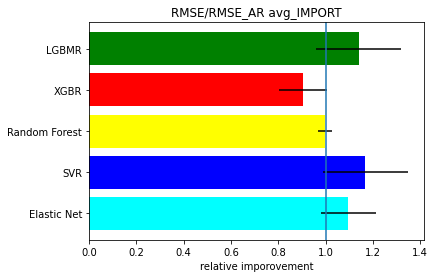

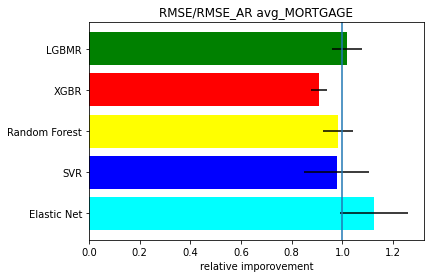

In [ ]:
for i,x in enumerate(averaged_RMSE):
  ddd=pd.DataFrame(averaged_RMSE[x])
  ddd=ddd.rename(columns={ddd.columns[0]: 'RMSE/RMSE_AR'})
  bar_plot(ddd, x, error=sd_RMSE_all[i])

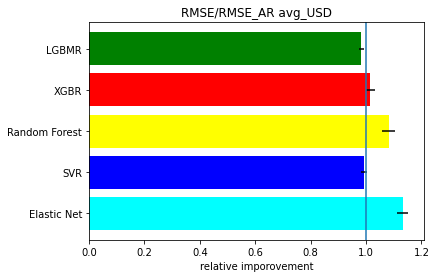

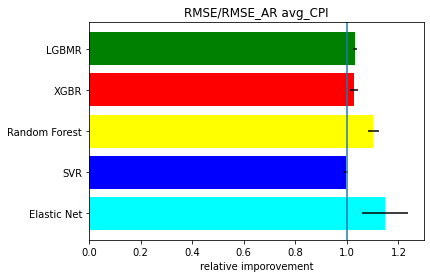

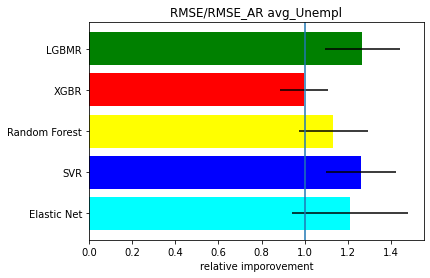

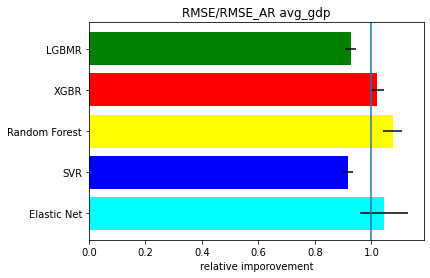

In [ ]:
for i,x in enumerate(averaged_RMSE):
  ddd=pd.DataFrame(averaged_RMSE[x])
  ddd=ddd.rename(columns={ddd.columns[0]: 'RMSE/RMSE_AR'})
  bar_plot(ddd, x, error=sd_RMSE_all[i])

In [ ]:

def myf(ttt):
  fff=ttt
  #fff['AR_1']=fff['AR_1'].map(lambda x: x[0])
  #fff['SVR']=fff['SVR'].map(lambda x: x[0])
  #fff['Elastic Net']=fff['Elastic Net'].map(lambda x: x[0])
  fff['Random Forest']=fff['Random Forest'].map(lambda x: x[0])
  fff['XGBR']=fff['XGBR'].map(lambda x: x[0])
  fff['LGBMR']=fff['LGBMR'].map(lambda x: x[0])
  return fff

In [ ]:
d2=d.copy()

In [ ]:
d2['GDP_h3']

,Elastic Net,SVR,Random Forest,XGBR,LGBMR,real,AR_1
dates,,,,,,,
2004-02-01,[6.366543610173797],[4.6650668836756815],[7.156493662371988],[6.1779838],[5.353222529093425],4.272423,[5.678580342808029]
2004-03-01,[5.349972469202512],[4.312095874902977],[6.4759031444262005],[5.7137437],[5.324011725348395],4.407128,[6.751439656321885]
2004-04-01,[4.904145296315696],[4.632663660385336],[5.163014639257191],[5.002887],[5.299883215050948],5.904762,[5.9563716383638425]
2004-05-01,[5.835850730507461],[5.866582986521424],[6.492501620054473],[5.9740486],[5.315392922132443],5.737705,[5.235687835527646]
2004-06-01,[5.524566049306798],[5.805683680742517],[6.98592276808437],[5.207191],[5.448532798167831],2.285954,[5.047366700303211]
...,...,...,...,...,...,...,...
2019-12-01,[6.868940134614712],[9.342476093046592],[11.910010751106913],[9.875443],[7.392913596889209],12.993691,[7.145393142390292]
2020-01-01,[6.895756258491634],[10.67582609162799],[16.287058534470226],[18.582323],[7.2954541637860935],20.185475,[7.243586212128039]
2020-02-01,[6.9539185819064],[9.597832635279426],[26.224205402541422],[14.135458],[8.04055367206089],18.961212,[7.281846818966043]


In [ ]:
list(d.keys())

['GDP_h3', 'GDP_h6', 'GDP_h9', 'MORTGAGE_h3', 'MORTGAGE_h6', 'MORTGAGE_h9']

In [ ]:
models

[ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=0.1,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
     kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)]

In [ ]:
mmm=['Elastic Net', 'SVR', 'Random Forest',	'XGBR',	'LGBMR']

In [ ]:
d2['CPI_h3']

,Elastic Net,SVR,Random Forest,XGBR,LGBMR,real,AR_1
dates,,,,,,,
2004-02-01,85.039502,84.957529,[84.67442762902598],[84.84323],[84.89414914449056],84.749709,84.894968
2004-03-01,84.851683,84.848437,[84.74194800155219],[84.77489],[84.89024538607211],84.866123,84.877777
2004-04-01,84.891357,84.883287,[84.93901212614833],[85.000725],[84.88961069207443],84.982538,84.882683
2004-05-01,84.888536,84.854972,[84.90418907182587],[84.990906],[84.8919934003781],84.943733,84.880603
2004-06-01,84.855851,84.840544,[84.96586100485985],[84.896454],[84.89381219373931],84.982538,84.882961
...,...,...,...,...,...,...,...
2020-02-01,84.954115,84.942920,[84.96701590997284],[84.82652],[84.95040610950886],84.943733,84.941376
2020-03-01,84.954070,84.942948,[84.98402257424377],[84.87587],[84.94933727497683],85.098952,84.946668
2020-04-01,84.954700,84.945377,[85.0046565774156],[84.940834],[84.95071791717727],85.176562,84.936855


In [ ]:
mmm=[	'XGBR',	'LGBMR','Random Forest']

In [ ]:
for m in mmm:

  for x in list(d.keys()):
  # print(x)
  # if x=='GDP_h3_text_diff':
      
 

    if '3' in x: # and x!='GDP_h3_text_diff':
      dm1=dm_test(d2[x]['real'], myf(d2[x])[m], d2[x]['AR_1'], h=3, crit="MSE", power = 2)

    if '6' in x:
      dm1=dm_test(d2[x]['real'], myf(d2[x])[m], d2[x]['AR_1'], h=6, crit="MSE", power = 2)

    if '9' in x:
      dm1=dm_test(d2[x]['real'], myf(d2[x])[m], d2[x]['AR_1'], h=9, crit="MSE", power = 2)
    
    if dm1.p_value<0.1 and dm1.DM<0:
      
      print(x,dm1)

CPI_h9 dm_return(DM=-1.6537446290270053, p_value=0.09983061253876176)


TypeError: ignored

In [ ]:
for m in mmm:
 
  for x in list(d.keys()):
   # print(x)
  # if x=='GDP_h3_text_diff':
      
 

    if '3' in x: # and x!='GDP_h3_text_diff':
      dm1=dm_test(d2[x]['real'], d2[x][m], d2[x]['AR_1'], h=1, crit="MSE", power = 2)

    if '6' in x:
      dm1=dm_test(d2[x]['real'], d2[x][m], d2[x]['AR_1'], h=1, crit="MSE", power = 2)

    if '9' in x:
      dm1=dm_test(d2[x]['real'], d2[x][m], d2[x]['AR_1'], h=1, crit="MSE", power = 2)
    
    if dm1.p_value<0.1 and dm1.DM<0:
      
      print(m,x,dm1)

XGBR DEPOSIT_h6 dm_return(DM=-1.7664471540389939, p_value=0.08319028094383596)
XGBR WAGES_h6 dm_return(DM=-2.2761680354619136, p_value=0.023939561336175988)
XGBR WAGES_h9 dm_return(DM=-2.3983407078470953, p_value=0.01744230943041999)
XGBR IMPORT_h6 dm_return(DM=-2.3681919593788643, p_value=0.018868719819496033)
XGBR IMPORT_h9 dm_return(DM=-2.7047388482832146, p_value=0.0074602188795676195)
LGBMR CPI_h9 dm_return(DM=-2.780156543582393, p_value=0.005979903320486769)


In [ ]:
list(d.keys())

['GDP_h3',
 'GDP_h6',
 'GDP_h9',
 'USD_h3',
 'USD_h6',
 'USD_h9',
 'DEPOSIT_h3',
 'DEPOSIT_h6',
 'DEPOSIT_h9',
 'CPI_h3',
 'CPI_h6',
 'CPI_h9',
 'UNEMPL_h3',
 'UNEMPL_h6',
 'UNEMPL_h9',
 'WAGES_h3',
 'WAGES_h6',
 'WAGES_h9',
 'IMPORT_h3',
 'IMPORT_h6',
 'IMPORT_h9',
 'MORTGAGE_h3',
 'MORTGAGE_h6',
 'MORTGAGE_h9']

In [ ]:
# Author   : John Tsang
# Date     : December 7th, 2017
# Purpose  : Implement the Diebold-Mariano Test (DM test) to compare 
#            forecast accuracy
# Input    : 1) actual_lst: the list of actual values
#            2) pred1_lst : the first list of predicted values
#            3) pred2_lst : the second list of predicted values
#            4) h         : the number of stpes ahead
#            5) crit      : a string specifying the criterion 
#                             i)  MSE : the mean squared error
#                            ii)  MAD : the mean absolute deviation
#                           iii) MAPE : the mean absolute percentage error
#                            iv) poly : use power function to weigh the errors
#            6) poly      : the power for crit power 
#                           (it is only meaningful when crit is "poly")
# Condition: 1) length of actual_lst, pred1_lst and pred2_lst is equal
#            2) h must be an integer and it must be greater than 0 and less than 
#               the length of actual_lst.
#            3) crit must take the 4 values specified in Input
#            4) Each value of actual_lst, pred1_lst and pred2_lst must
#               be numerical values. Missing values will not be accepted.
#            5) power must be a numerical value.
# Return   : a named-tuple of 2 elements
#            1) p_value : the p-value of the DM test
#            2) DM      : the test statistics of the DM test
##########################################################
# References:
#
# Harvey, D., Leybourne, S., & Newbold, P. (1997). Testing the equality of 
#   prediction mean squared errors. International Journal of forecasting, 
#   13(2), 281-291.
#
# Diebold, F. X. and Mariano, R. S. (1995), Comparing predictive accuracy, 
#   Journal of business & economic statistics 13(3), 253-264.
#
##########################################################
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 3, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt